# Linear Regression Machine Learning Project for House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('/mnt/c/Users/StrawHat/Dataset/house-prices-advanced-regression-techniques/housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
train_data = X_train.join(Y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9621,-120.30,37.34,33.0,993.0,186.0,556.0,175.0,2.4286,INLAND,103600.0
110,-122.25,37.82,52.0,1424.0,289.0,550.0,253.0,5.0917,NEAR BAY,262500.0
6819,-118.09,34.09,40.0,855.0,208.0,745.0,222.0,3.0125,<1H OCEAN,224000.0
19335,-122.85,38.52,13.0,4808.0,848.0,2568.0,762.0,3.6583,<1H OCEAN,183200.0
18254,-122.09,37.39,36.0,1035.0,196.0,475.0,205.0,5.5385,NEAR BAY,359000.0
...,...,...,...,...,...,...,...,...,...,...
9184,-118.55,34.38,24.0,6246.0,1028.0,2803.0,999.0,6.3002,<1H OCEAN,282900.0
10889,-117.90,33.70,15.0,2289.0,686.0,982.0,634.0,4.5757,<1H OCEAN,162500.0
4719,-118.38,34.06,25.0,2558.0,661.0,1183.0,636.0,3.5556,<1H OCEAN,500000.0
14617,-117.15,32.80,27.0,1937.0,537.0,1211.0,482.0,2.7500,NEAR OCEAN,87500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

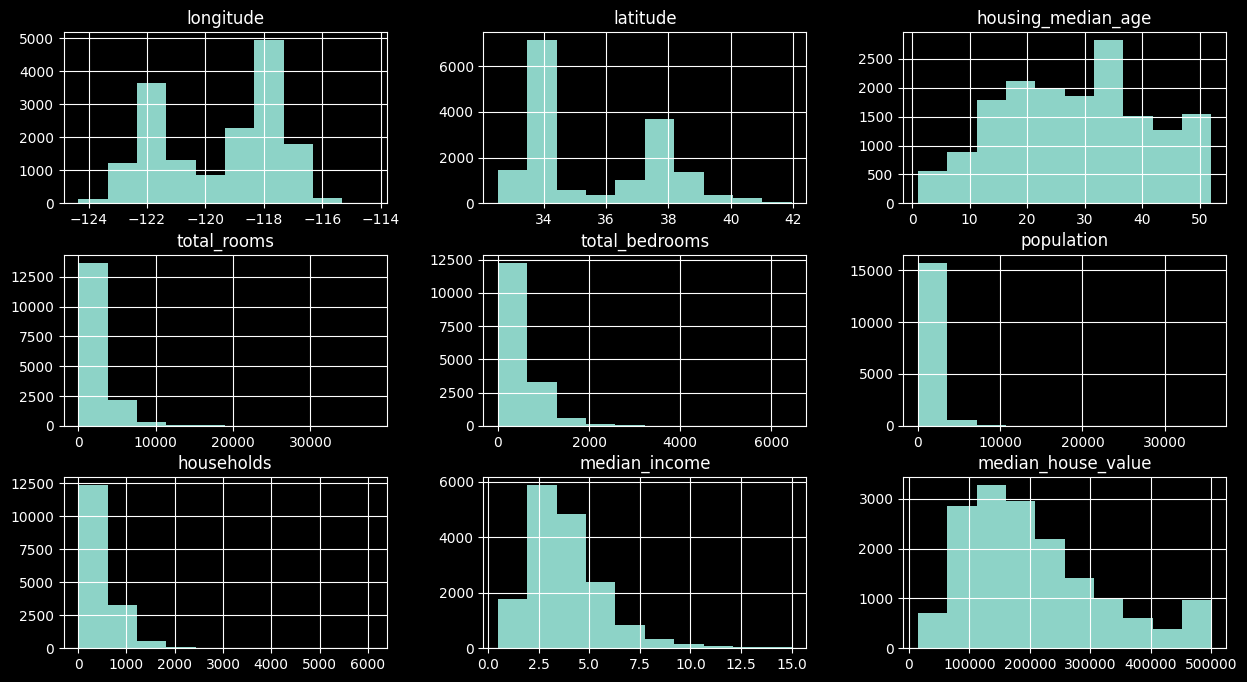

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

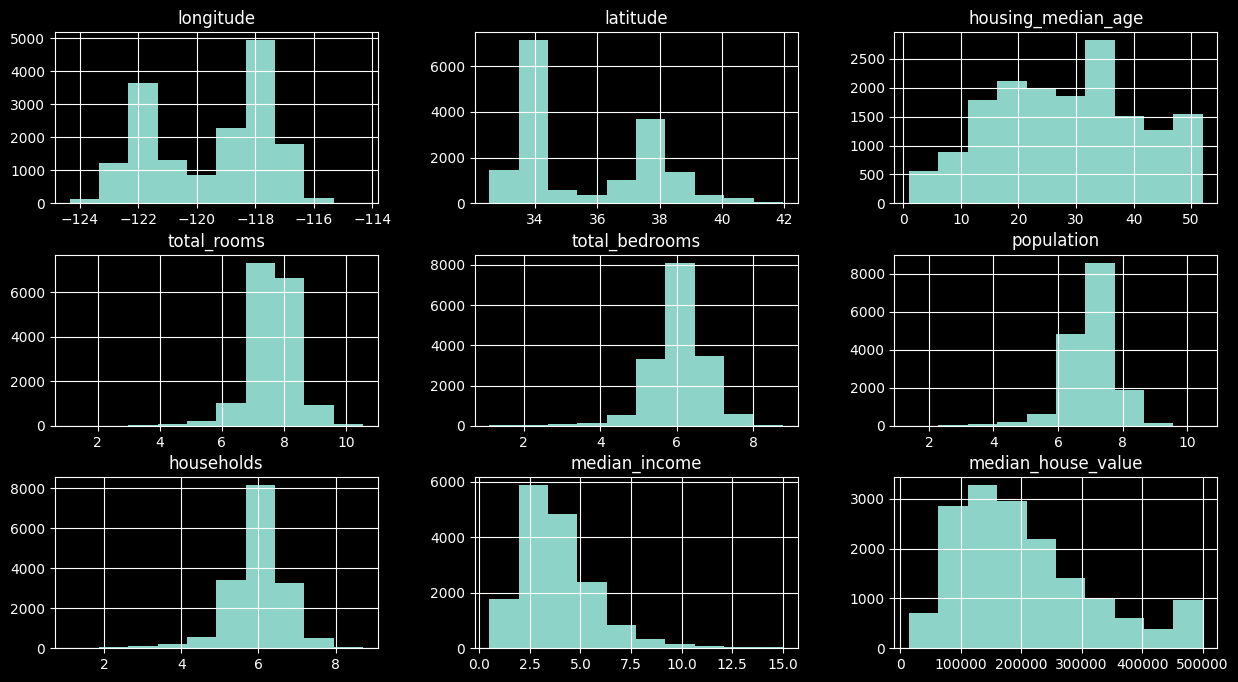

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9621,-120.30,37.34,33.0,6.901737,5.231109,6.322565,5.170484,2.4286,103600.0,False,True,False,False,False
110,-122.25,37.82,52.0,7.261927,5.669881,6.311735,5.537334,5.0917,262500.0,False,False,False,True,False
6819,-118.09,34.09,40.0,6.752270,5.342334,6.614726,5.407172,3.0125,224000.0,True,False,False,False,False
19335,-122.85,38.52,13.0,8.478244,6.744059,7.851272,6.637258,3.6583,183200.0,True,False,False,False,False
18254,-122.09,37.39,36.0,6.943122,5.283204,6.165418,5.327876,5.5385,359000.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9184,-118.55,34.38,24.0,8.739857,6.936343,7.938802,6.907755,6.3002,282900.0,True,False,False,False,False
10889,-117.90,33.70,15.0,7.736307,6.532334,6.890609,6.453625,4.5757,162500.0,True,False,False,False,False
4719,-118.38,34.06,25.0,7.847372,6.495266,7.076654,6.456770,3.5556,500000.0,True,False,False,False,False
14617,-117.15,32.80,27.0,7.569412,6.287859,7.100027,6.180017,2.7500,87500.0,False,False,False,False,True


<Axes: >

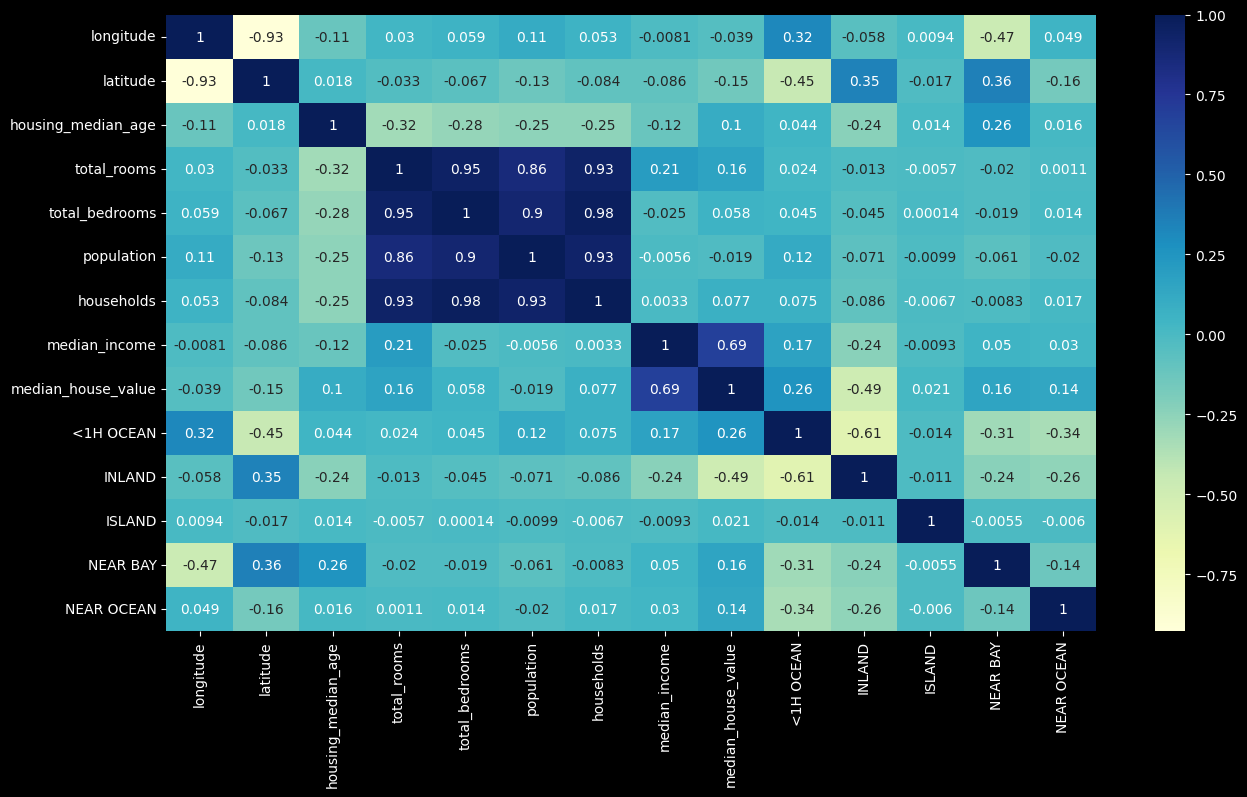

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

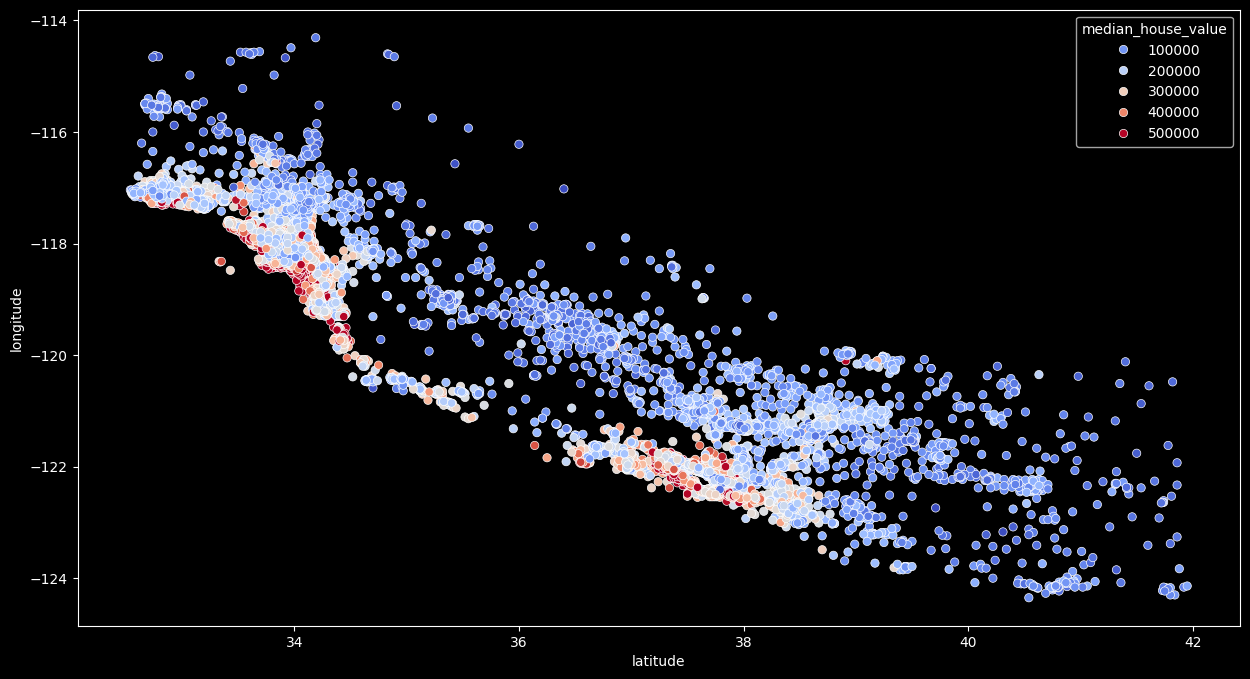

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

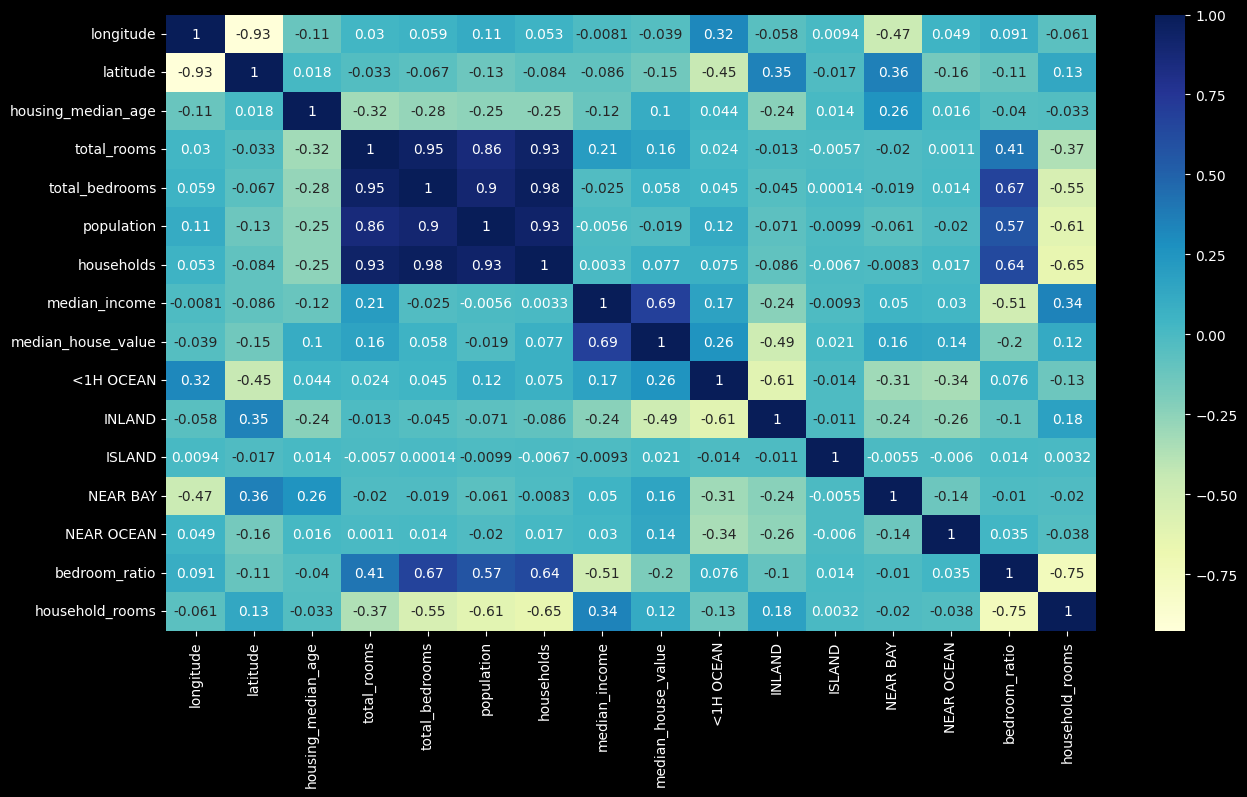

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Training the Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [24]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [25]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
4839,-118.29,34.03,42.0,6.811244,5.937536,6.712956,5.666427,1.2875,179200.0,True,False,False,False,False,0.871726,1.202035
6205,-117.88,34.06,23.0,8.808369,7.025538,8.033334,6.954639,5.9254,491200.0,True,False,False,False,False,0.797598,1.266546
10633,-117.79,33.70,16.0,8.741935,7.002156,8.239065,7.016610,6.3298,247100.0,True,False,False,False,False,0.800985,1.245892
19430,-121.06,37.66,6.0,8.204125,6.395262,7.597898,6.391917,4.6053,150100.0,False,True,False,False,False,0.779518,1.283516
1681,-122.36,38.03,32.0,7.677864,5.976351,6.889591,5.913503,4.3173,175400.0,False,False,False,True,False,0.778387,1.298361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,-118.23,34.24,31.0,8.257904,6.410175,7.436028,6.350886,7.6420,396400.0,True,False,False,False,False,0.776247,1.300276
1036,-120.79,38.43,40.0,7.238497,5.509388,6.304449,5.370638,3.9107,129800.0,False,True,False,False,False,0.761123,1.347791
6986,-118.03,33.97,39.0,7.599401,5.966147,6.937314,5.961005,4.6500,224300.0,True,False,False,False,False,0.785081,1.274852
2034,-119.75,36.73,39.0,7.736744,6.291569,7.430114,6.285998,1.6325,52100.0,False,True,False,False,False,0.813206,1.230790


In [26]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
X_test_s = scaler.transform(X_test)

In [28]:
reg.score(X_test, Y_test)

0.6769736415535348

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [30]:
forest.score(X_test_s, Y_test)

0.8199298999436256

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2,4],
    "max_depth": [None,4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)